In [39]:
import pandas as pd
import numpy as np
import sys
sys.path.append("/home/msdos/DESI-QA/desiarc-main/arc")
sys.path.append("/home/msdos/DESI-QA/")
import reportlib as rl
import matplotlib.pyplot as plt
import getArcVals as gAV

In [12]:
def filterDates(dateStart,dateEnd):

    db = pd.read_csv("../output/database.csv") #l27 -> l28

    db['move']=rl.toNumpy(db['move'])
    
    return db[db['move']>=startTime[dateIter]][db['move']<=endTime[dateIter]]


def plot_xy_mount(targetDF,datemin, datemax,fig,ax,label,show=True,save=False,ret=False):
    '''
    Function to plot an xy plot for a given data set, defined by the dataframe 
    '''
    
    title=np.unique(targetDF['label'][targetDF['label'].str.contains(label)])[0]+'\n Mount configuration: '+str(np.unique(targetDF['mtang1'][targetDF['label'].str.contains(label)])[0])+" "+str(np.unique(targetDF['mtang2'][targetDF['label'].str.contains(label)])[0])

    xytgt = pd.read_csv(f"../movetables/{movefn}", sep=" ", header=None)
    xytgt.columns = ['xpos', 'ypos']
    
    moveResults = targetDF[targetDF['label'].str.contains(label)]

    x_mm,y_mm = pix2mm*moveResults['xpix'],pix2mm*moveResults['ypix']
    x,y = (x_mm-xc),(y_mm-yc)
    residuals = np.array(x)-np.array(xytgt["xpos"]),np.array(y)-np.array(xytgt["ypos"])

    ax.scatter(x,y, c='black', marker ='+', s=30)
    ax.scatter('xpos', 'ypos', data=xytgt, facecolors='none',edgecolors='r', 
               s=10, c='red', lw=0.5,label='target')
    ax.set_xlabel('xpos (mm)')
    ax.set_ylabel('ypos (mm)')
    ax.set_title(title, fontsize=8)
#     ax.set_xlim(-8,8)
    plt.gca().set_aspect('equal')
    plt.legend(loc='lower left', fontsize=8)
    if save:
        plt.savefig(pathname+"/xy_fig "+str(np.unique(targetDF['mtang1'][targetDF['label'].str.contains(label)])[0])+" "+str(np.unique(targetDF['mtang2'][targetDF['label'].str.contains(label)])[0])+".jpg",dpi=180)
    if show:
        plt.show()
    if ret:
        return (x,y), xytgt,title

def getDates(df):
    thetaMask = df['label'].str.contains('arcth')
    thetaMask = ((thetaMask) & (df['motor']=='theta'))

    phiMask = df['label'].str.contains('arcph')

    reducedCol = rl.toNumpy(df[thetaMask]['label'].str[8:])
    reducedCol2 = rl.toNumpy(df[phiMask]['label'].str[8:])

    dates = [np.unique(reducedCol)[0],np.unique(reducedCol2)[0]]
    assert len(dates)==2, \
        f"Length of dates array incorrect: length should be 2, measured length is {len(dates)}"
    if dates[0]<dates[1]:
        date1 = dates[1]
        date2 = dates[0]
    else:
        date1 = dates[0]
        date2 = dates[1]

    return gAV.main(dates[0],dates[1]), dates

In [55]:
startTime = np.array(['2023-08-11 09:32:18'],dtype=np.datetime64)
endTime = startTime+np.timedelta64(75,"m")
dateIter = 0

df = filterDates(startTime[dateIter],endTime[dateIter])

/home/msdos/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [56]:
phiMask = df['label'].str.contains("arcph")
thetaMask = df['label'].str.contains("arcth")
thetaMask = ((thetaMask) & (df['motor']=="theta"))

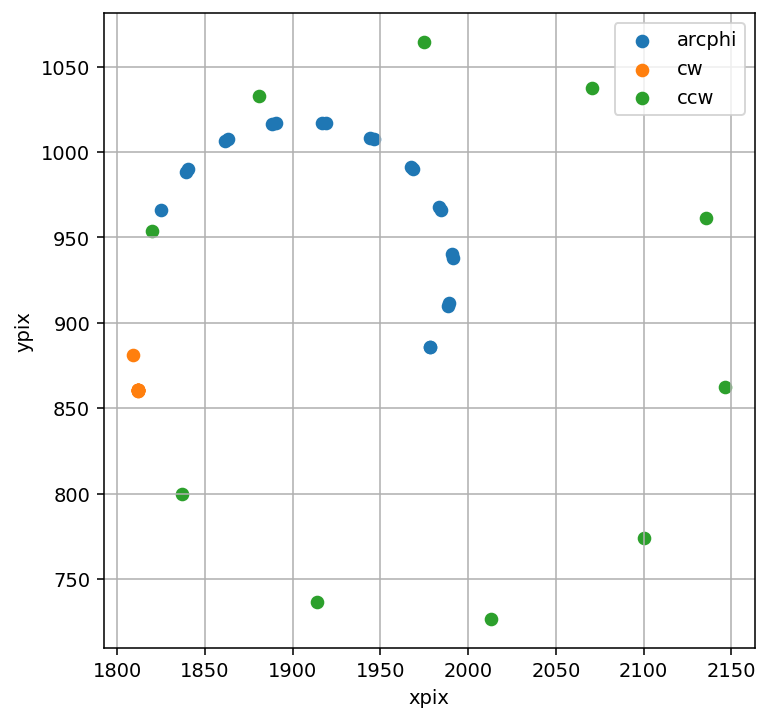

In [57]:
plt.figure(figsize=[6,6])

plt.scatter(df[phiMask]['xpix'],df[phiMask]['ypix'],label='arcphi')
plt.scatter(df[thetaMask][df[thetaMask]['direction']=='cw']['xpix'],
            df[thetaMask][df[thetaMask]['direction']=='cw']['ypix'],label='cw')
plt.scatter(df[thetaMask][df[thetaMask]['direction']=='ccw']['xpix'],
            df[thetaMask][df[thetaMask]['direction']=='ccw']['ypix'],label="ccw")
plt.legend()
plt.grid()
plt.xlabel("xpix")
plt.ylabel("ypix")


plt.show()

In [51]:
date1, date2 = "2023-08-10 10:46:00","2023-08-10 10:50:00"

gAV.main(date2,date1)

arcth pix2mm: 0.035345999999999995
arcph pix2mm: 0.035358


(2.9424841580206476,
 3.0702644993562487,
 69.91860612607616,
 31.59221074028467,
 67.899542415842,
 33.73267675361401,
 -133.32820873016087)

In [59]:
df[thetaMask][['xpix','ypix']]

,xpix,ypix
78196,1809.298623,881.462101
78197,1812.024797,860.796913
78198,1812.051556,860.630369
78199,1812.059422,860.579520
78200,1812.075532,860.480026
78201,1812.090571,860.388292
78202,1812.092851,860.306556
78203,1812.067508,860.534288
78204,1812.023032,860.652858
78205,1812.074900,860.514397


In [47]:
df[thetaMask]['move']

77942   2023-08-10 10:50:38
77943   2023-08-10 10:50:47
77944   2023-08-10 10:50:55
77945   2023-08-10 10:51:04
77946   2023-08-10 10:51:13
77947   2023-08-10 10:51:22
77948   2023-08-10 10:51:31
77949   2023-08-10 10:51:41
77950   2023-08-10 10:51:50
77951   2023-08-10 10:51:59
77952   2023-08-10 10:52:08
77953   2023-08-10 10:52:17
77954   2023-08-10 10:52:25
77955   2023-08-10 10:52:34
77956   2023-08-10 10:52:43
77957   2023-08-10 10:52:52
77958   2023-08-10 10:53:01
77959   2023-08-10 10:53:10
77960   2023-08-10 10:53:19
77961   2023-08-10 10:53:28
Name: move, dtype: datetime64[ns]